# Previsão de Engajamento - Classificação

In [204]:
#@title Importações de pacote
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [205]:
BASE_PATH = 'dados/'

# 1 - Carrega os Dados

Carregando dados brutos.

In [206]:
dfx = pd.read_excel(BASE_PATH + 'bolsonaro-preproc2-inputs.xlsx', index_col='ID')
dfx.head()


,Dispositivo Retórico,Main character,Retórica Aristotélica,Tipo de conteúdo,Texto / Hashtag,Tonalidade,Abordagem,Duracao
ID,,,,,,,,
7114971700365691904,Political Statement,Self alone,Pathos,Campaign Act,Hashtag,Neutral,Acclamation,57.93
7115050482179050496,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Positive,Acclamation,17.13
7115120078982631424,Commitment,Self + voters,Ethos,Political-Purposeful,Hashtag,Positive,Acclamation,52.54
7115161088219565056,Humor,Self alone,Nenhum,Personal,Hashtag,Positive,Acclamation,34.48
7115207919750253568,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Negative,Attack,66.66


In [207]:
dfy = pd.read_excel(BASE_PATH + 'bolsonaro-preproc2-outputs.xlsx', index_col='ID')
dfy.head()

,Curtidas,Curtidas-Log,Curtidas-4Classes,Curtidas-2Classes
ID,,,,
7114971700365691904,24400,10.102338,medium-low,0
7115050482179050496,9163,9.122929,low,0
7115120078982631424,3485,8.156223,low,0
7115161088219565056,22100,10.003333,medium-low,0
7115207919750253568,115700,11.658756,high,1


In [208]:
df_merged = pd.merge(dfx, dfy, on="ID", how="inner")

In [209]:
df_merged

,Dispositivo Retórico,Main character,Retórica Aristotélica,Tipo de conteúdo,Texto / Hashtag,Tonalidade,Abordagem,Duracao,Curtidas,Curtidas-Log,Curtidas-4Classes,Curtidas-2Classes
ID,,,,,,,,,,,,
7114971700365691904,Political Statement,Self alone,Pathos,Campaign Act,Hashtag,Neutral,Acclamation,57.93,24400,10.102338,medium-low,0
7115050482179050496,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Positive,Acclamation,17.13,9163,9.122929,low,0
7115120078982631424,Commitment,Self + voters,Ethos,Political-Purposeful,Hashtag,Positive,Acclamation,52.54,3485,8.156223,low,0
7115161088219565056,Humor,Self alone,Nenhum,Personal,Hashtag,Positive,Acclamation,34.48,22100,10.003333,medium-low,0
7115207919750253568,Fact/Statistic,Self alone,Logos,Political-Purposeful,Hashtag,Negative,Attack,66.66,115700,11.658756,high,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7159766081593151488,Endorsement,Nenhum,Ethos,Campaign Act,Hashtag,Positive,Acclamation,74.16,95300,11.464785,high,0
7159773640030997504,Humor,Self + opponent,Ethos,Nenhum,Texto + Hashtag,Neutral,Attack,5.32,240900,12.392137,high,1
7159891102143631360,Humor,Self + opponent,Nenhum,Nenhum,Hashtag,Neutral,Attack,7.73,109600,11.604593,high,1


In [210]:
#classes_str = ['low', 'medium-low', 'medium-high', 'high']
#dfy = df['Curtidas-4Classes'].apply(lambda x: classes_str.index(x))

classes_str = ['LOW', 'HIGH']
dfy = dfy['Curtidas-2Classes']
dfy.head()

ID
7114971700365691904    0
7115050482179050496    0
7115120078982631424    0
7115161088219565056    0
7115207919750253568    1
Name: Curtidas-2Classes, dtype: int64

# 2 - Códigos de Preparação

In [211]:
CATEGORICAL_COLS = ['Dispositivo Retórico', 'Main character', 'Retórica Aristotélica', 'Tipo de conteúdo',
                    'Texto / Hashtag', 'Tonalidade', 'Abordagem']

## 2.1 - Transformações

Conjunto de transformações que serão aplicadas nos dados:

In [212]:
#from sklearn.base import clone
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # porque SMOTE não funciona com o Pipeline do scikit-learn

In [213]:
#@title Definições Auxiliares
from sklearn.base import BaseEstimator, TransformerMixin

class Identity(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X):
        return self

    def transform(self, X):
        return X

    def fit_transform(self, X, y=None):
        return X

In [214]:
from imblearn import FunctionSampler

IdentitySampler = lambda : FunctionSampler(func=lambda X, y : (X, y))

In [215]:
# This is necessary to allow encoding training and/or test data correctly
CATEGORIES = [dfx[col].unique() for col in CATEGORICAL_COLS]

def one_hot_encoder(drop_first=True):
   DROP_TYPE = 'first' if drop_first else 'if_binary'
   _transf_o=[
        ('cat', OneHotEncoder(categories=CATEGORIES, drop=DROP_TYPE, sparse_output=False), CATEGORICAL_COLS)]
   ct = ColumnTransformer(transformers=_transf_o, remainder='passthrough')
   ct._simplified_name = f"OneHotEncoder(drop='{DROP_TYPE}')"
   return ct 

def target_encoder_binary():
    _transf_t1=[
        ('cat', TargetEncoder(shuffle=False, target_type='binary'), CATEGORICAL_COLS)]
    ct = ColumnTransformer(transformers=_transf_t1, remainder='passthrough')
    ct._simplified_name = f"TargetEncoder(target_type='binary')"
    return ct 

def target_encoder_continuous(use_log):
    _transf_t2=[
        ('cat', TargetEncoder(shuffle=False, target_type='continuous'), CATEGORICAL_COLS)]
    # IDEIAS DE COMO FAZER: ver abaixo!
    ct = ColumnTransformer(transformers=_transf_t2, remainder='passthrough')
    ct._simplified_name = f"TargetEncoderX(target_type='continuous',use_log={use_log})"
    return ct 

# TEM QUE PRE-TREINAR, COMO FAZER? 
# TODO: criar classe especial, que tem acesso prévio interno ao y
# FAZ UM JOIN PELO INDEX e APLICA ???
#_transf_t2=[
#        ('cat', TargetEncoder(shuffle=False, target_type='continuous'), CATEGORICAL_COLS)]
#targetenc2 = ColumnTransformer(transformers=_transf_t2, remainder='passthrough')

#_transf_t3=[
        #('cat', TargetEncoder(shuffle=False, target_type='continuous'), CATEGORICAL_COLS)]
#targetenc2 = ColumnTransformer(transformers=_transf_t3, remainder='passthrough')

In [216]:
oh = one_hot_encoder(drop_first=True)
oh._label = 'One-HotEncoding(True)'
print(oh._label)

One-HotEncoding(True)


In [217]:
from sklearn.base import clone

## 2.2 - Lista de Modelos

In [225]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#from xgboost import XGBClassifier

In [226]:
############ NÃO USADOS ############
{
    "nome_do_modelo": 'Support Vector Machine',
    "estimador": Pipeline([
        ('preproc', one_hot_encoder()),
        ('smote', SMOTE(random_state=42)),
        ('scaler', StandardScaler()), 
        ('predictor', SVC(probability=True))
    ]),
    "parametros": {
        'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
        'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()], 
        'scaler': [Identity(), StandardScaler(), MinMaxScaler()],
        'predictor__C': [0.1, 10, 50],
        #'predictor__gamma': ['scale', 'auto'],
        'predictor__gamma': ['auto'],
        'predictor__kernel': ['linear', 'sigmoid']
        #'predictor__kernel': ['linear', 'rbf', 'sigmoid']
    }
},
{
    "nome_do_modelo": 'Decision Tree',
    "estimador": Pipeline([
        ('preproc', one_hot_encoder()),
        ('smote', SMOTE(random_state=42)),
        ('predictor', DecisionTreeClassifier())
    ]),
    "parametros": {
        'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
        'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()],
        'predictor__criterion': ['gini', 'entropy', 'log_loss'],
        'predictor__max_depth': [3, 5, None], 
        'predictor__min_samples_split': [2, 4, 8, 16], 
        'predictor__min_samples_leaf': [1, 2, 4, 8], 
        'predictor__max_features': ['sqrt', 'log2']
    }
},
{
    "nome_do_modelo": 'Random Forest',
    "estimador": Pipeline([
        ('preproc', one_hot_encoder()),
        ('smote', SMOTE(random_state=42)),
        ('predictor', RandomForestClassifier())
    ]),
    "parametros": {
        'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
        'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()],  # SMOTE(random_state=42),
        'predictor__n_estimators': [10, 20, 40, 60], 
        'predictor__max_depth': [3, 5, None],
        'predictor__min_samples_split': [2, 4, 8, 16],
        'predictor__min_samples_leaf': [1, 2, 4, 8],
        'predictor__max_features': ['sqrt', 'log2']
    }
},
#{
#    "nome_do_modelo": "XGBoost",
#    "estimador": XGBClassifier(),
#    "parametros": {'max_depth': [3, 5, 7]}
#},
#####################################
;

''

Resultados em 30/04/2024:

 **** RESULTADO DOS MODELOS + CURVAS ROC E PR ****

Treinando modelo Gradient Boosting .
....
-- coletando e armazenando resultados --

Modelo     : Gradient Boosting
Acurácia   : 0.65189 +/- 0.11257
Precisão   : 0.33487 +/- 0.10702
Revocação  : 0.37273 +/- 0.06471
F1 - Score : 0.33703 +/- 0.05491
ROC - AUC  : 0.63033 +/- 0.11451
PR - AUC   : 0.35162 +/- 0.09197
Tempo médio de treinamento: 239.86621 segundos

==================================================

Treinando modelo Logistic Regression ...
c:\Users\pablo\.conda\envs\socialnet\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
..
-- coletando e armazenando resultados --

Modelo     : Logistic Regression
Acurácia   : 0.72083 +/- 0.09231
Precisão   : 0.43314 +/- 0.12929
Revocação  : 0.65758 +/- 0.15995
F1 - Score : 0.52044 +/- 0.14215
ROC - AUC  : 0.71973 +/- 0.07865
PR - AUC   : 0.43159 +/- 0.08315
Tempo médio de treinamento: 11.34146 segundos

==================================================

Treinando modelo KNN .....
-- coletando e armazenando resultados --

Modelo     : KNN
Acurácia   : 0.61720 +/- 0.08832
Precisão   : 0.33307 +/- 0.09453
Revocação  : 0.64091 +/- 0.14435
F1 - Score : 0.43454 +/- 0.10531
ROC - AUC  : 0.69478 +/- 0.10369
PR - AUC   : 0.39786 +/- 0.09980
Tempo médio de treinamento: 19.12337 segundos

==================================================

Treinando modelo Random Forest .....
-- coletando e armazenando resultados --

Modelo     : Random Forest
Acurácia   : 0.72054 +/- 0.07143
Precisão   : 0.41735 +/- 0.12399
Revocação  : 0.44091 +/- 0.08151
F1 - Score : 0.42274 +/- 0.09816
ROC - AUC  : 0.68505 +/- 0.12552
PR - AUC   : 0.40215 +/- 0.10566
Tempo médio de treinamento: 365.25523 segundos

==================================================


In [227]:
lista_modelos = [
    {
        "nome_do_modelo": 'Gradient Boosting',
        "estimador": Pipeline([
            ('preproc', one_hot_encoder()),
            ('smote', SMOTE(random_state=42)),
            ('scaler', StandardScaler()), 
            ('predictor', GradientBoostingClassifier())
        ]),
        "parametros": {
            'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
            'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()],
            'scaler': [Identity(), StandardScaler(), MinMaxScaler()],
            'predictor__n_estimators': [5, 10, 20, 30], 
            'predictor__max_depth': [3, 5, None],
            'predictor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5], 
            'predictor__loss': ['log_loss', 'exponential']
        }
    },
    {
        "nome_do_modelo": 'Logistic Regression',
        "estimador": Pipeline([
            ('preproc', one_hot_encoder()),
            ('smote', SMOTE(random_state=42)),
            ('scaler', StandardScaler()), 
            ('predictor', LogisticRegression())
        ]),
        "parametros": {
            'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
            'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()], 
            'scaler': [Identity(), StandardScaler(), MinMaxScaler()],
            'predictor__class_weight': ['balanced'],       # For when SMOTE is not used, adjust weights by class sizes
            'predictor__C': [0.01, 0.1, 1.0, 2.0],   # Regularization parameter
            'predictor__solver': ['saga'],                 # Solver for optimization, saga is the only one to support the 3 options for 'penalty'
            'predictor__penalty': ['l1', 'l2', None]       # Penalty term
        }
    },
    {
        "nome_do_modelo": 'KNN',
        "estimador": Pipeline([
            ('preproc', one_hot_encoder()),
            ('smote', SMOTE(random_state=42)),
            ('scaler', StandardScaler()), 
            ('predictor', KNeighborsClassifier())
        ]),
        "parametros": {
            'preproc': [one_hot_encoder(True), one_hot_encoder(False), target_encoder_binary()],
            'smote': [SMOTE(random_state=42,k_neighbors=3), IdentitySampler()],  # SMOTE(random_state=42),
            'scaler': [Identity(), StandardScaler(), MinMaxScaler()],
            'predictor__n_neighbors': [5, 10, 15, 20], 
            'predictor__weights': ['uniform', 'distance'], 
            'predictor__p': [1, 2]
        }
    },

]



# 3 - Treinamento

## 3.1 - Códigos de Treinamento

Reflexões sobre os dados a serem usados para treinar:

1. É importante considerar o **equilíbrio entre *bias* e variância**. 
  - usar todos os dados disponíveis para treinar o modelo pode aumentar o **bias** (viés) do modelo;
  - usar apenas parte dos dados pode aumentar a **variância** do modelo. 

2. Em geral, é recomendável usar a **maior quantidade** de dados possível para treinar o modelo final, desde que isso não comprometa a capacidade do modelo de generalizar para novos dados. 

3. Estamos usando uma **nested cross-validation"" para melhor aproveitar nossa quantidade de dados relativamente pequena. Nela, todos os dados são usados para treinar e para avaliar. Isso acontece por meio de uma 5-fold cross-validation externa, assim:
- os dados são emabaralhados (*shuffled*) e divididos em 5 partes, porém mantendo a proporção da classe de saída. (Ou seja, em cada uma dessas partes, a classe HIGH tem 25% dos dados).
- repete 5 vezes isso, separando uma das partes por vez como conjunto de teste:
  - as outras quatro partes são usadas, juntas, para rodar um grid search
  - o grid-search por sua vez, será avaliado por outra validação cruzada 5-fold semelhante à anterior
  - ou seja, para cada parametrização a ser avaliada, um modelo é treinado com 4 das novas partes, e avaliado na parte restante (usada como conjunto de validação)
  - esse processo gera, modelo para cada parametrização, uma avaliação robusta, resultado de 5 retreinamentos + validação
  - apenas o melhor resultado (do modelo avaliado nos 5 conjuntos de validação) é reportado
- ao final, cada tipo de modelo tem 5 avaliações robustas nas 5 partes de teste


In [228]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics

In [229]:
def treinamento_modelo(estimador, X_train, y_train):
    """
    Treina um modelo com os dados de treinamento.

    Args:
        estimador: Um modelo de aprendizado de máquina (classificador/regressor).
        X_train: Dados de treinamento.
        y_train: Rótulos de treinamento.

    Returns:
        estimador_treinado: O modelo treinado.
        tempo_treinamento: O tempo de treinamento em segundos.
    """
    inicio_treinamento = time.time()
    estimador_treinado = estimador.fit(X_train, y_train)
    fim_treinamento = time.time()
    tempo_treinamento = fim_treinamento - inicio_treinamento
    return estimador_treinado, tempo_treinamento

In [230]:
def analise_modelos(lista_modelos, X, y):
    """
    Esta função treina vários modelos e avalia seu desempenho usando métricas como acurácia, precisão, revocação e F1-score.
    Também plota as curvas ROC e PR e a matriz de confusão para cada modelo.

    Args:
        lista_modelos: Uma lista de dicionários contendo informações sobre os modelos a serem treinados.
        X: Conjunto de dados.
        y: Rótulos.

    Returns:
        dict: Um dicionário com as métricas de desempenho de cada modelo.
    """

    print(f"\n\n\n **** RESULTADO DOS MODELOS + CURVAS ROC E PR ****\n")

    # Lista para armazenar os valores de fpr e tpr de cada modelo (para a curva ROC)
    roc_fpr_list = []
    roc_tpr_list = []

    # Lista para armazenar os valores de precision e recall de cada modelo (para a curva PR)
    pr_precision_list = []
    pr_recall_list = []
        
    resultados_iteracao = {}  # Dicionário para armazenar os resultados desta iteração

    # Configurando a busca em grade dentro de cada iteração da validação cruzada externa
    for mdl in lista_modelos:
        nome_do_modelo = mdl["nome_do_modelo"]
        estimador = mdl.get('estimador')
        parametros = mdl.get('parametros')

        # Listas para armazenar métricas de interesse em cada fold
        accuracy_list = []
        precision_list = []
        recall_list = []
        f1_score_list = []
        auc_score_list = []
        aucpr_score_list = []

        print(f"Treinando modelo {nome_do_modelo} ", end="")

        # Configurando a validação cruzada externa
        cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Configurando a busca em grade
        grid_search = GridSearchCV(estimador, parametros, scoring='f1', cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=17), n_jobs=-1)
        # testes com 'precision' - resultados ruins

        # Executando a validação cruzada
        tempos_de_treinamento = []
        best_model_params = []
        best_trained_models = []

        for train_ix, test_ix in cv_outer.split(X, y):
            print(".", end="")
            X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
            y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

            # Capturando tempo de treinamento
            modelo_treinado, tempo_treinamento = treinamento_modelo(grid_search, X_train, y_train)
            
            best_model_params.append(modelo_treinado.best_params_)
            best_trained_models.append(clone(modelo_treinado.best_estimator_))
            tempos_de_treinamento.append(tempo_treinamento)

            # Avaliação do modelo (com os melhores parâmetros encontrados) no conjunto de teste
            y_pred = modelo_treinado.predict(X_test)
            accuracy = metrics.accuracy_score(y_test, y_pred)
            precisions = metrics.precision_score(y_test, y_pred)
            recalls = metrics.recall_score(y_test, y_pred)
            f1 = metrics.f1_score(y_test, y_pred)

            # Armazenando métricas deste fold
            accuracy_list.append(accuracy)
            precision_list.append(precisions)
            recall_list.append(recalls)
            f1_score_list.append(f1)

            y_pred_proba = modelo_treinado.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
            
            # Calcula auc-ROC
            auc_score = metrics.roc_auc_score(y_test, y_pred_proba)
            auc_score_list.append(auc_score)

            # Valores para a curva ROC
            fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)  # Calcula FPR e TPR
            roc_fpr_list.append(fpr)
            roc_tpr_list.append(tpr)

            # Calcula auc-PR
            # https://datascience.stackexchange.com/questions/9003/when-do-i-have-to-use-aucpr-instead-of-auroc-and-vice-versa
            aucpr_score = metrics.average_precision_score(y_test, y_pred_proba)  # Calcula AUC-PR
            aucpr_score_list.append(aucpr_score)

            # Valores para a curva PR
            precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)  # Calcula Precision e Recall
            pr_precision_list.append(precisions)
            pr_recall_list.append(recalls)

        
        print("\n-- coletando e armazenando resultados --\n")

        # Calculando as médias e desvios padrão das métricas
        accuracy_mean = np.mean(accuracy_list)
        accuracy_std = np.std(accuracy_list)
        precision_mean = np.mean(precision_list)
        precision_std = np.std(precision_list)
        recall_mean = np.mean(recall_list)
        recall_std = np.std(recall_list)
        f1_score_mean = np.mean(f1_score_list)
        f1_score_std = np.std(f1_score_list)

        auc_mean = np.mean(auc_score_list)
        auc_std = np.std(auc_score_list)
        aucpr_mean = np.mean(aucpr_score_list)
        aucpr_std = np.std(aucpr_score_list)

        print(f"Modelo     : {nome_do_modelo}")
        print(f"Acurácia   : {accuracy_mean:.5f} +/- {accuracy_std:.5f}")
        print(f"Precisão   : {precision_mean:.5f} +/- {precision_std:.5f}")
        print(f"Revocação  : {recall_mean:.5f} +/- {recall_std:.5f}")
        print(f"F1 - Score : {f1_score_mean:.5f} +/- {f1_score_std:.5f}")
        print(f"ROC - AUC  : {auc_mean:.5f} +/- {auc_std:.5f}")
        print(f"PR - AUC   : {aucpr_mean:.5f} +/- {aucpr_std:.5f}")
        print(f"Tempo médio de treinamento: {np.mean(tempos_de_treinamento):.3f} segundos\n")
        print('=' * 50, '\n')

        #resultados_iteracao[mdl.get('nome_do_modelo')]  = {
        resultados_iteracao[nome_do_modelo]  = {
            "Acurácia_mean": accuracy_mean,
            "Acurácia_std": accuracy_std,
            "Precisão_mean": precision_mean,
            "Precisão_std": precision_std,
            "Revocação_mean": recall_mean,
            "Revocação_std": recall_std,
            "f1_score_mean": f1_score_mean,
            "f1_score_std": f1_score_std,
            "auc_mean": auc_mean,
            "auc_std": auc_std,
            "aucpr_mean": aucpr_mean,
            "aucpr_std": aucpr_std,
            "tempo_medio_treinamento": np.mean(tempos_de_treinamento),
            "f1_score_list": f1_score_list,
            "melhores_parametros": best_model_params,
            "melhores_modelos": best_trained_models
        }

    # Depois de treinar todos os modelos:

    # Plota a curva ROC geral
    plt.figure(figsize=(10, 8)) 
    for fpr, tpr, mdl in zip(roc_fpr_list, roc_tpr_list, lista_modelos):
        plt.plot(fpr, tpr, label='%s ROC' % mdl["nome_do_modelo"])
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('CURVA ROC-AUC')
    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0))  # Posiciona a legenda
    plt.show()

    # Plota a curva PR geral
    plt.figure(figsize=(10, 8))
    for precisions, recalls, mdl in zip(pr_precision_list, pr_recall_list, lista_modelos):
        plt.plot(recalls, precisions, label='%s PR' % mdl["nome_do_modelo"])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('CURVA PR')
    plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0))  # Posiciona a legenda
    plt.show()

    return resultados_iteracao

## 3.2 - Chamada Principal




 **** RESULTADO DOS MODELOS + CURVAS ROC E PR ****

Treinando modelo Gradient Boosting .

....
-- coletando e armazenando resultados --

Modelo     : Gradient Boosting
Acurácia   : 0.65189 +/- 0.11257
Precisão   : 0.33487 +/- 0.10702
Revocação  : 0.37273 +/- 0.06471
F1 - Score : 0.33703 +/- 0.05491
ROC - AUC  : 0.63033 +/- 0.11451
PR - AUC   : 0.35162 +/- 0.09197
Tempo médio de treinamento: 239.86621 segundos


Treinando modelo Logistic Regression ...

c:\Users\pablo\.conda\envs\socialnet\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


..
-- coletando e armazenando resultados --

Modelo     : Logistic Regression
Acurácia   : 0.72083 +/- 0.09231
Precisão   : 0.43314 +/- 0.12929
Revocação  : 0.65758 +/- 0.15995
F1 - Score : 0.52044 +/- 0.14215
ROC - AUC  : 0.71973 +/- 0.07865
PR - AUC   : 0.43159 +/- 0.08315
Tempo médio de treinamento: 11.34146 segundos


Treinando modelo KNN .....
-- coletando e armazenando resultados --

Modelo     : KNN
Acurácia   : 0.61720 +/- 0.08832
Precisão   : 0.33307 +/- 0.09453
Revocação  : 0.64091 +/- 0.14435
F1 - Score : 0.43454 +/- 0.10531
ROC - AUC  : 0.69478 +/- 0.10369
PR - AUC   : 0.39786 +/- 0.09980
Tempo médio de treinamento: 19.12337 segundos


Treinando modelo Random Forest .....
-- coletando e armazenando resultados --

Modelo     : Random Forest
Acurácia   : 0.72054 +/- 0.07143
Precisão   : 0.41735 +/- 0.12399
Revocação  : 0.44091 +/- 0.08151
F1 - Score : 0.42274 +/- 0.09816
ROC - AUC  : 0.68505 +/- 0.12552
PR - AUC   : 0.40215 +/- 0.10566
Tempo médio de treinamento: 365.25523 se

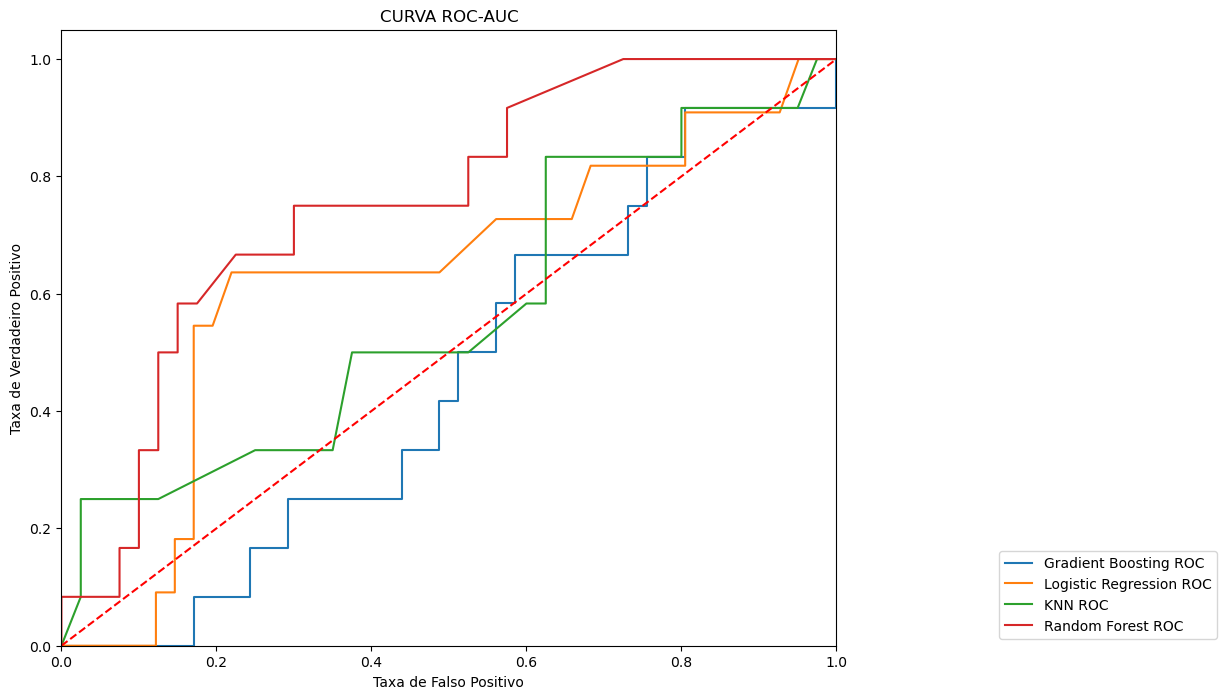

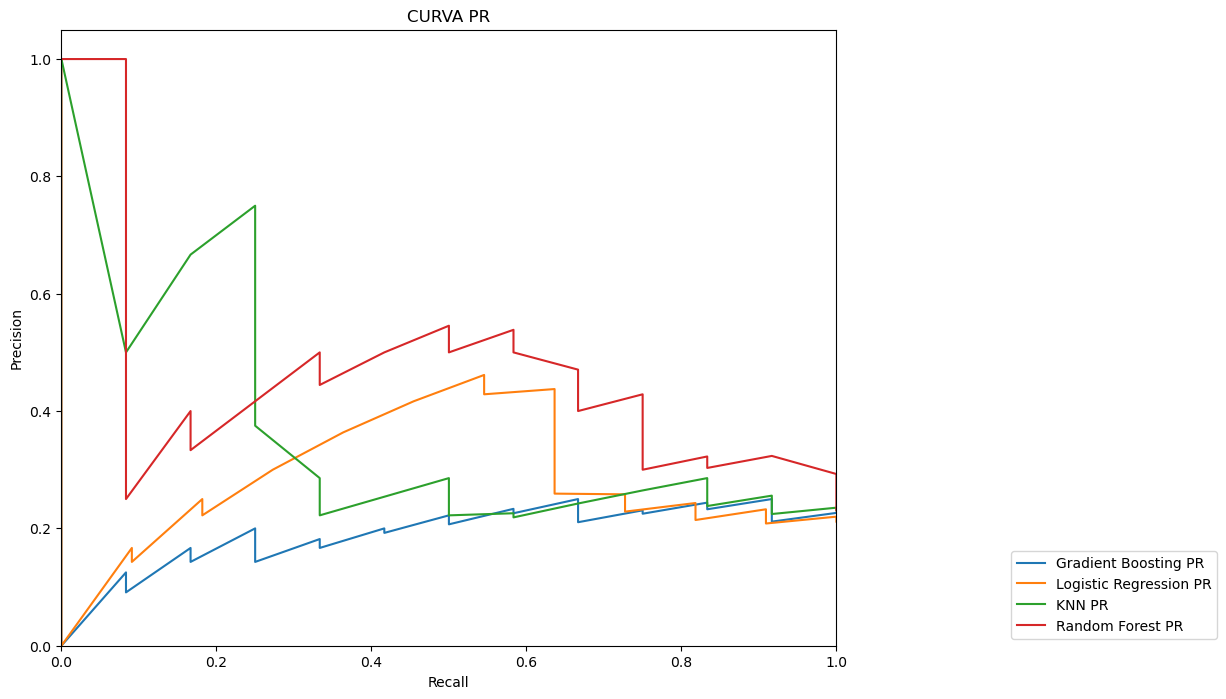

In [231]:
result = analise_modelos(lista_modelos, dfx, dfy)

In [233]:
MODEL_NAMES = [mdl["nome_do_modelo"] for mdl in lista_modelos]

In [242]:
# dataframe que contém para cada nome de modelo, as médias das métricas de avaliação
result_data_dict = {k: [v['Acurácia_mean'], v['Precisão_mean'], v['Revocação_mean'], v['f1_score_mean'], v['auc_mean'], v['aucpr_mean'], v['tempo_medio_treinamento']] for k, v in result.items()}
df_result = pd.DataFrame(result_data_dict, index=['Acurácia', 'Precisão', 'Revocação', 'F1-Score', 'ROC-AUC', 'PR-AUC', 'Tempo médio de treinamento']).T
df_result

,Acurácia,Precisão,Revocação,F1-Score,ROC-AUC,PR-AUC,Tempo médio de treinamento
Gradient Boosting,0.651887,0.334869,0.372727,0.337032,0.630326,0.351619,239.866214
Logistic Regression,0.720827,0.433142,0.657576,0.520438,0.719734,0.431589,11.341458
KNN,0.617199,0.333070,0.640909,0.434535,0.694775,0.397857,19.123374
Random Forest,0.720537,0.417350,0.440909,0.422737,0.685049,0.402155,365.255229


In [243]:
from ipywidgets import interact

In [246]:
METRICS = ['Acurácia', 'Precisão', 'Revocação', 'F1-Score', 'ROC-AUC', 'PR-AUC', 'Tempo médio de treinamento']
def order_models_by(metric):
    display(df_result.sort_values(by=metric, ascending=False))
    return

interact(order_models_by, metric=METRICS);

interactive(children=(Dropdown(description='metric', options=('Acurácia', 'Precisão', 'Revocação', 'F1-Score',…

## 3.3 - Melhores Hiper-Parâmetros por Modelo

In [234]:
from collections import Counter

def aggregate_best_params(model_name):
    best_params_list = result[model_name]['melhores_parametros']
    
    # for each name of parameter, counts the number of times each of its value appeared among the best
    params_count = dict()

    for param_name in best_params_list[0].keys():
        # fora each value of the parameter, counts the occurences
        params_count[param_name] = Counter()
        
        for params in best_params_list:
            if param_name == 'preproc':
                param_value = params[param_name]._simplified_name
            else:
                param_value = params[param_name]
            params_count[param_name][param_value] += 1
    
    display(params_count)

#aggregate_best_params('Logistic Regression')
interact(aggregate_best_params, model_name=MODEL_NAMES)

interactive(children=(Dropdown(description='model_name', options=('Gradient Boosting', 'Logistic Regression', …

<function __main__.aggregate_best_params(model_name)>

In [241]:
def list_all_best_params(model_name):
    best_params_list = result[model_name]['melhores_parametros']
    for i, paramset in enumerate(best_params_list):
        print("BEST PARAM SET", i, ":")
        for key in paramset.keys():
            if key == 'preproc':
                print(f" - {key}: {paramset[key]._simplified_name}")
            else:
                print(f" - {key}: {paramset[key]}")
        print(f" - f1 score: {result[model_name]['f1_score_list'][i]:.4f}")

#list_all_best_params('Logistic Regression')
list_all_best_params('Random Forest')

BEST PARAM SET 0 :
 - predictor__max_depth: 3
 - predictor__max_features: sqrt
 - predictor__min_samples_leaf: 4
 - predictor__min_samples_split: 8
 - predictor__n_estimators: 10
 - preproc: OneHotEncoder(drop='first')
 - smote: SMOTE(k_neighbors=3, random_state=42)
 - f1 score: 0.4227
BEST PARAM SET 1 :
 - predictor__max_depth: 3
 - predictor__max_features: log2
 - predictor__min_samples_leaf: 2
 - predictor__min_samples_split: 2
 - predictor__n_estimators: 20
 - preproc: TargetEncoder(target_type='binary')
 - smote: SMOTE(k_neighbors=3, random_state=42)
 - f1 score: 0.4227
BEST PARAM SET 2 :
 - predictor__max_depth: 3
 - predictor__max_features: sqrt
 - predictor__min_samples_leaf: 4
 - predictor__min_samples_split: 2
 - predictor__n_estimators: 20
 - preproc: OneHotEncoder(drop='first')
 - smote: SMOTE(k_neighbors=3, random_state=42)
 - f1 score: 0.4227
BEST PARAM SET 3 :
 - predictor__max_depth: 3
 - predictor__max_features: log2
 - predictor__min_samples_leaf: 4
 - predictor__min_

# 4 - Importância dos Atributos


- Baseado nos valores de `feature_importances_` calculados em alguns modelos

In [236]:
#@title Definições auxiliares (não precisa abrir)
from sklearn.tree import plot_tree
import numpy as np
import matplotlib.pyplot as plt

def plot_importance(model, title=None, max_features=None, feature_names=None, sort=True, ax=None):
    """
    Plot feature importances for a scikit-learn random forest or gradient boosting model.

    Parameters
    ----------
    model : object
        A scikit-learn random forest or gradient boosting model.
    title: str or None, optional (default=None)
        The title of the plot.
    max_features : int or None, optional (default=None)
        The maximum number of features to plot. If None, plot all features.
    feature_names : list or None, optional (default=None)
        A list of feature names to use in the plot. If None, use the feature indices.
    sort : bool, optional (default=True)
        Whether to sort the feature importances in descending order.
    ax : matplotlib.axes.Axes or None, optional (default=None)
        The matplotlib axes to plot the feature importances on. If None, create a new figure and axes.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The matplotlib axes containing the plot.

    """
    # Extract feature importances
    importances = model.feature_importances_

    # Get feature names
    if feature_names is None:
        feature_names = [str(i) for i in range(len(importances))]

    # Sort feature importances
    if sort:
        indices = np.argsort(importances)[::-1]
        importances = importances[indices]
        feature_names = [feature_names[i] for i in indices]

    # Truncate feature importances
    if max_features is not None:
        importances = importances[:max_features]
        feature_names = feature_names[:max_features]

    # Create plot
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        ax.set_title(title)
    ax.barh(np.arange(len(importances)), importances, align='center')
    ax.set_yticks(np.arange(len(importances)))
    ax.set_yticklabels(feature_names)
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

    return ax

In [237]:
if 'Decision Tree' in result:
    # best model of the 1st fold of the outer cross-validation
    dec_tree_pipeline = result['Decision Tree']['melhores_modelos'][0]

    # fit the pipeline to the WHOLE dataset
    dec_tree_pipeline.fit(dfx, dfy)

    display(dec_tree_pipeline)
    
    # the decision tree model inside the pipeline
    dec_tree = dec_tree_pipeline.named_steps['predictor']
    feature_names = dec_tree_pipeline.named_steps['preproc'].get_feature_names_out()

    fig = plt.figure(figsize=(22,15))
    plot_tree(dec_tree, feature_names=list(feature_names), filled=True);

O modelo Logistic Regression não registra as importâncias das features
O modelo KNN não registra as importâncias das features


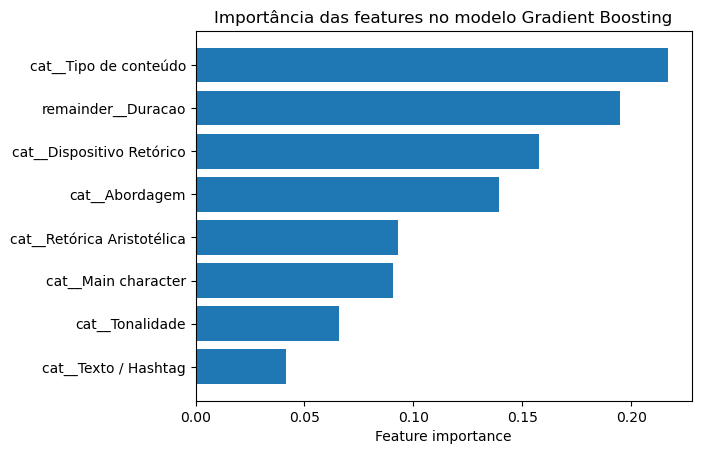

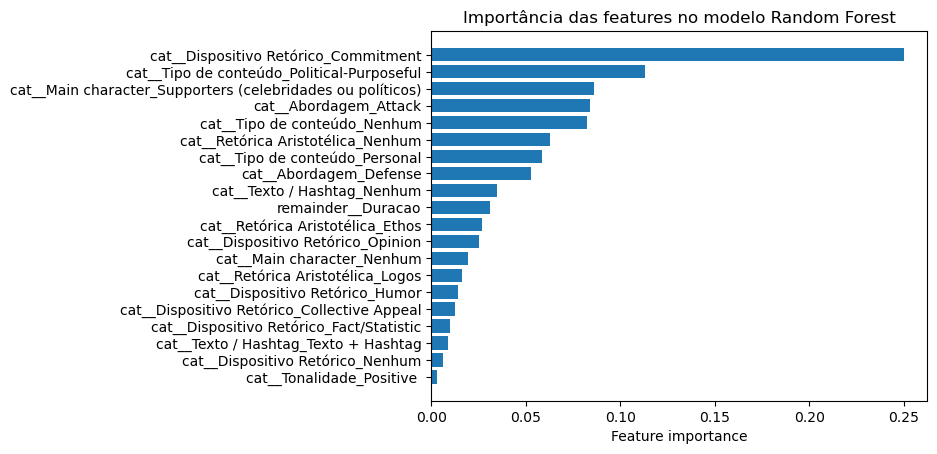

In [238]:
for model_name in result.keys():
    model_pipeline = result[model_name]['melhores_modelos'][0]  # the best model found in the first fold
    model_predictor = model_pipeline.named_steps['predictor']

    model_pipeline.fit(dfx, dfy)  # fit the pipeline to the WHOLE dataset

    # testa se o modelo guarda as importâncias das features
    if not hasattr(model_predictor, 'feature_importances_'):
        print(f"O modelo {model_name} não registra as importâncias das features")
        continue
    features = model_pipeline.named_steps['preproc'].get_feature_names_out()
    plot_importance(model_predictor, title=f"Importância das features no modelo {model_name}", feature_names=features, max_features=20)

# 5 (REMOVER?) - Treinamento e Avaliação do Modelo Final

In [239]:
y_predicted = best_model_grid.predict(X_test)

print(classification_report(y_test, y_predicted))

NameError: name 'best_model_grid' is not defined

In [ ]:
print("Matrix de confusão (linhas - rótulos verdadeiros; colunas - rótulos previstos):")

matrix = confusion_matrix(y_test, y_predicted, normalize='true')

pd.DataFrame(matrix, columns=classes_str, index=classes_str) 

Matrix de confusão (linhas - rótulos verdadeiros; colunas - rótulos previstos):


,LOW,HIGH
LOW,0.902439,0.097561
HIGH,0.500000,0.500000


### Alguns Resultados 


Modelo otimizado (no grid search) com a métrica **f1 score weighted** (recomendo usar esta):

- Melhores parâmetros (grid search)

```
BEST RESULTS:
-> model: Logist Regression
-> params: {'logreg__C': 0.001, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'scaler': StandardScaler()}
-> grid-search score: -0.74 (f1 weighted)

```

- Resultados (modelo final, treinado apenas com dados de treinamento e avaliado com dados de teste separados)

```
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.40      0.50      0.44        12

    accuracy                           0.72        53
   macro avg       0.62      0.64      0.63        53
weighted avg       0.74      0.72      0.73        53
```

- Matriz de confusão
```
      LOW  HIGH
LOW   32    9
HIGH   6    6
```


---
Usando o **f1 score da classe positiva**:

- Melhores parâmetros

```
BEST RESULTS:
-> model: Logist Regression
-> params: {'logreg__C': 0.001, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear', 'scaler': StandardScaler()}
-> grid-search score: -0.44  (f1 score da classe 1)
```  

- Resultados

```
              precision    recall  f1-score   support

       False       0.84      0.78      0.81        41
        True       0.40      0.50      0.44        12

    accuracy                           0.72        53
   macro avg       0.62      0.64      0.63        53
weighted avg       0.74      0.72      0.73        53
```


- Matriz de confusão

```
      LOW  HIGH
LOW   32    9
HIGH   6    6
```

---
Usando o **precision** da classe positiva (é esquisito, mas deu bom resultado):

- Melhores parâmetros

```
BEST RESULTS:
-> model: Decision Tree
-> params: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 15}
-> grid-search score: -0.56  (precision)
``` 

- Resultados

```
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.67      0.33      0.44        12

    accuracy                           0.81        53
   macro avg       0.75      0.64      0.67        53
weighted avg       0.79      0.81      0.79        53
```

- Matriz de confusão

```
      LOW  HIGH
LOW   39    2
HIGH   8    4

```